In [1]:
# 每張大小為 192 × 168，含 38 人，每人約有 59-64 張人臉影像，每張略有不同，包括表情、光線等
# 有38個人(類別)，共有2410張圖片(資料數量)
# 嘗試將圖片分類是屬於哪個人的臉
import numpy as np
import scipy.io
D = scipy.io.loadmat("allFaces.mat")
X = D["faces"]  # 32256 2410
y = np.ndarray.flatten(D["nfaces"]) #38 #每個人臉的張數
#因為每個人臉的張數差不多，所以不會有imbalance data的問題

m = int(D["m"]) #168
n = int(D["n"]) #192

n_persons = int(D["person"]) #38
print(D)
print(range(n_persons)) 

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Sep  4 19:53:55 2014', '__version__': '1.0', '__globals__': [], 'faces': array([[80, 94, 59, ...,  3,  4,  4],
       [81, 87, 67, ...,  4,  4,  3],
       [80, 88, 66, ...,  2,  4,  4],
       ...,
       [14,  7,  6, ...,  0,  1,  1],
       [14,  9,  6, ...,  1,  1,  0],
       [11,  8,  7, ...,  1,  1,  2]], dtype=uint8), 'n': array([[192]], dtype=uint8), 'm': array([[168]], dtype=uint8), 'sub': array([[(array([[39]], dtype=uint8), array([[70, 84, 88, ...,  3,  4,  4],
               [74, 83, 95, ...,  4,  4,  3],
               [69, 82, 97, ...,  2,  4,  4],
               ...,
               [ 1,  2,  3, ...,  0,  1,  1],
               [ 1,  3,  3, ...,  1,  1,  0],
               [ 2,  2,  3, ...,  1,  1,  2]], dtype=uint8), array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                0, 0, 0, 0, 0

觀察資料集中的38張人臉

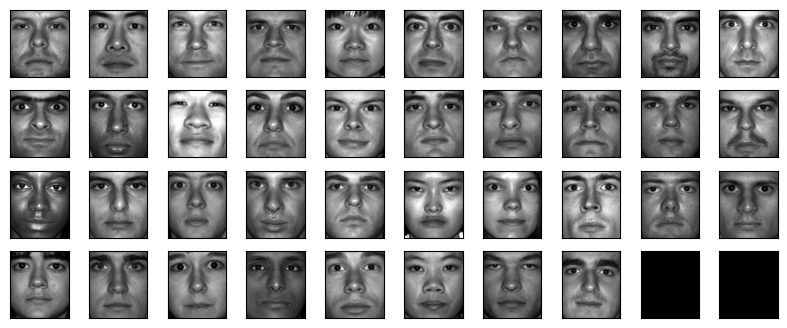

In [2]:
import matplotlib.pyplot as plt
def show_montage(X, n, m, h, w):
#X: 影 像 資 料 矩 陣 ， 每 行 代 表 一 張 影 像
#n, m: 每 張 影 像 的 大 小 n x m
#h, w : 建 立 一 個 蒙 太 奇 圖 陣 ， 大小 figsize = (w,h)
    fig, axes = plt.subplots(h, w, figsize=(w, h))
    if X.shape[1] < w * h: # 影 像 張 數 不 到 w x h 張 ， 用 0 向量補齊
        X = np.c_[X, np.zeros((X.shape[0], w*h - X.shape[1]))]
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[:,i].reshape(m, n).T, cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

all_diff_persons = np.zeros((m*n, n_persons))
cnt = 0
for i in range(n_persons):
    all_diff_persons[:, i] = X[:, cnt]
    cnt = cnt + y[i]
    
show_montage(all_diff_persons, n, m, 4, 10)

此資料是照順序排列的，前64張照片是第一個人，接下來62張照片是第二個人，故我們可以以此規律來進行標記

In [3]:
# 共有2410張圖片
# 0-37共有38個人
# 將每張圖片進行標記，看是屬於哪個人的臉
label = np.zeros(2410)
print(np.arange(0, 38, 1))
for i in np.arange(0, 38, 1):
    which_person = i #要看哪一個人
    start_col = y[0:which_person].sum() 
    end_col = start_col + y[which_person] 
    label[start_col:end_col] = i
print(label)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
[ 0.  0.  0. ... 37. 37. 37.]


In [4]:
import pandas as pd
df = pd.DataFrame(X.T)
df['label'] = label
print(df)

       0   1   2   3   4   5   6   7   8   9  ...  32247  32248  32249  32250  \
0     80  81  80  79  80  82  79  80  83  82  ...     27     36     25     19   
1     94  87  88  87  88  86  93  92  90  89  ...     10     14     13     12   
2     59  67  66  74  75  76  85  91  92  92  ...      7      7      6      6   
3     16  14  14  15  15  15  15  17  16  15  ...      6      5      5      4   
4     69  67  67  69  67  70  72  70  68  68  ...     33     34     29     30   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...    ...    ...    ...    ...   
2405   3   3   3   2   4   3   3   4   4   3  ...      0      0      0      1   
2406   3   4   4   2   4   5   4   3   3   3  ...      0      0      0      0   
2407   3   4   2   3   4   3   4   3   3   3  ...      0      0      0      0   
2408   4   4   4   4   4   3   3   3   3   3  ...      0      0      0      0   
2409   4   3   4   4   4   5   5   4   4   3  ...      0      0      0      0   

      32251  32252  32253  

In [65]:
X = np.array(df.drop("label", axis = 1)) #2410 32256
y = np.array(df["label"]) #2410

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_ = scaler.transform(X)  #標準化

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

test_size = 0.25
#use standardized data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)

scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train) #1807 32256
X_test_ = scaler.transform(X_test) #603 32256

接著觀察三種分類器評比，我們會使用：
1. original + logistic
2. original + svm
3. original + neural network
4. standard+svd + logistic
5. standard+svd + svm
6. standard+svd + neural network
7. standard+pca + logistic
8. standard+pca + svm
9. standard+pca + neural network
來進行分類器評比

1. original + logistic regression

In [7]:
from sklearn.linear_model import LogisticRegression
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose = True)

# clf_LR = LogisticRegression(**opts, solver = "lbfgs", tol = 1e-6)
clf_LR = LogisticRegression(solver = "lbfgs", **opts)
clf_LR.fit(X_train, y_train) #input data must be (n_samples x n_features)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =      1225766     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57312D+03    |proj g|=  4.08363D+03


 This problem is unconstrained.



At iterate   50    f=  2.39228D+00    |proj g|=  2.84868D+00

At iterate  100    f=  9.01432D-01    |proj g|=  1.93684D+00

At iterate  150    f=  4.24296D-01    |proj g|=  1.20597D-01

At iterate  200    f=  2.26107D-01    |proj g|=  2.69727D-01

At iterate  250    f=  1.40240D-01    |proj g|=  3.64115D-02

At iterate  300    f=  1.12493D-01    |proj g|=  2.18545D-02

At iterate  350    f=  9.82448D-02    |proj g|=  1.01561D-02

At iterate  400    f=  9.22221D-02    |proj g|=  3.45140D-03

At iterate  450    f=  9.09744D-02    |proj g|=  3.66231D-03

At iterate  500    f=  9.08045D-02    |proj g|=  3.56960D-03

At iterate  550    f=  9.07629D-02    |proj g|=  3.62785D-03

At iterate  600    f=  9.06511D-02    |proj g|=  3.57661D-03

At iterate  650    f=  8.97342D-02    |proj g|=  3.40518D-03

At iterate  700    f=  8.53394D-02    |proj g|=  3.45086D-03

At iterate  750    f=  7.66025D-02    |proj g|=  1.04782D-02

At iterate  800    f=  6.79664D-02    |proj g|=  2.74172D-03

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 34.8min finished


LogisticRegression(max_iter=1000000, tol=1e-06, verbose=True)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

score = clf_LR.score(X_train, y_train)
print("the training score is {:.4f}".format(score))
score = clf_LR.score(X_test, y_test)
print("the testing score is {:.4f}".format(score))

predictions = clf_LR.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
origin_logis = round(accuracy_score(y_test, predictions), 2)

the training score is 1.0000
the testing score is 0.9536
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.94      1.00      0.97        15
         2.0       0.82      0.93      0.87        15
         3.0       0.96      1.00      0.98        22
         4.0       1.00      1.00      1.00        21
         5.0       1.00      0.93      0.96        14
         6.0       1.00      0.86      0.93        22
         7.0       0.94      1.00      0.97        17
         8.0       1.00      0.94      0.97        17
         9.0       0.89      0.89      0.89        18
        10.0       1.00      0.83      0.91        18
        11.0       1.00      1.00      1.00         9
        12.0       1.00      0.93      0.97        15
        13.0       1.00      1.00      1.00        16
        14.0       0.94      1.00      0.97        15
        15.0       1.00      1.00      1.00         9
        16.0       1.00 

2. original + svm

In [49]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C = 5 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))
clf_svm = SVC(kernel="poly", **opts)

clf_svm.fit(X_train, y_train)
predictions = clf_svm.predict(X_test)
print("kernal 設為 poly 的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
origin_svm_poly = round(accuracy_score(y_test, predictions), 2)

# -------------------------------------------------------------
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))
clf_svm = SVC(kernel="linear", **opts)

clf_svm.fit(X_train, y_train)
predictions = clf_svm.predict(X_test)
print("kernal 設為 linear 的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
origin_svm_linear = round(accuracy_score(y_test, predictions), 2)

# -------------------------------------------------------------
C = 1 # SVM regularization parameter
opts = dict(C = C, decision_function_shape = "ovo", tol = 1e-6, max_iter = int(1e6))
clf_svm = SVC(kernel="rbf", **opts)

clf_svm.fit(X_train, y_train)
predictions = clf_svm.predict(X_test)
print("kernal 設為 rbf 的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
origin_svm_rbf = round(accuracy_score(y_test, predictions), 2)
accuracy_score(y_test, predictions)

kernal 設為 poly 的 svm 模型預測準確率
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        11
         1.0       1.00      0.73      0.85        15
         2.0       1.00      0.73      0.85        15
         3.0       0.95      0.86      0.90        22
         4.0       1.00      0.67      0.80        21
         5.0       0.87      0.93      0.90        14
         6.0       0.80      0.73      0.76        22
         7.0       1.00      0.82      0.90        17
         8.0       1.00      0.82      0.90        17
         9.0       1.00      0.72      0.84        18
        10.0       0.93      0.78      0.85        18
        11.0       1.00      1.00      1.00         9
        12.0       1.00      0.80      0.89        15
        13.0       1.00      0.94      0.97        16
        14.0       1.00      0.93      0.97        15
        15.0       0.90      1.00      0.95         9
        16.0       1.00      0.93      0.96        1

0.8009950248756219

3. original + neural network
因為默認結果不理想，故先利用grid research找最佳參數

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Create the MLPClassifier
clf = MLPClassifier()

# Create a parameter grid to search over
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (100,100,100), (150,150,150)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],from sklearn.model_selection import GridSearchCV
    from sklearn.neural_network import MLPClassifier
    
    # Create the MLPClassifier
    clf = MLPClassifier()
    
    # Create a parameter grid to search over
    param_grid = {
        'hidden_layer_sizes': [(50,50,50), (100,100,100), (150,150,150)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant','adaptive'],
    }
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(clf, param_grid, cv=3, verbose=2)
    
    # Fit the GridSearchCV object to the data
    grid_search.fit(X, y)
    
    # Get the best parameters
    best_params = grid_search.best_params_
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant','adaptive'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=3, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=  34.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=  27.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=  23.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=  13.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=  16.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=  11.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time= 1.2min
[CV] END activation=tanh, alpha=0.0001,

/Users/guoyixuan/Documents/pythoncode/ccwML/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=sgd; total time= 2.3min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=adam; total time=  16.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=adam; total time=  42.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=adam; total time=  23.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(150, 150, 150), learning_rate=constant, solver=sgd; total time=  29.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(150, 150, 150), learning_rate=constant, solver=sgd; total time=  27.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(150, 150, 150), learning_rate=constant, solver=sgd; total time=  50.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(150, 150, 150), lear

/Users/guoyixuan/Documents/pythoncode/ccwML/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(150, 150, 150), learning_rate=adaptive, solver=sgd; total time= 2.4min


/Users/guoyixuan/Documents/pythoncode/ccwML/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(150, 150, 150), learning_rate=adaptive, solver=sgd; total time= 2.3min
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(150, 150, 150), learning_rate=adaptive, solver=adam; total time=  38.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(150, 150, 150), learning_rate=adaptive, solver=adam; total time=  59.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(150, 150, 150), learning_rate=adaptive, solver=adam; total time=  26.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=  10.9s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=  31.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=  28.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solv

/Users/guoyixuan/Documents/pythoncode/ccwML/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=sgd; total time= 1.6min
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=sgd; total time= 1.2min
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=adam; total time=  11.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=adam; total time=  21.9s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=adam; total time=  17.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 150, 150), learning_rate=constant, solver=sgd; total time=  22.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 150, 150), learning_rate=constant, solver=sgd; total time=  38.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 150, 150), learning_rate=consta

In [71]:
print(best_params)
print(grid_search)

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'solver': 'adam'}
GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50, 50, 50), (100, 100, 100),
                                                (150, 150, 150)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=2)


接著根據結果grid research結果嘗試設定參數

激發函數設定"relu"

Iteration 1, loss = 34.74532147
Iteration 2, loss = 34.62441268
Iteration 3, loss = 33.84113193
Iteration 4, loss = 32.29614609
Iteration 5, loss = 30.97906876
Iteration 6, loss = 28.60840611
Iteration 7, loss = 26.76908002
Iteration 8, loss = 24.05510176
Iteration 9, loss = 25.18097574
Iteration 10, loss = 22.00855037
Iteration 11, loss = 17.42811270
Iteration 12, loss = 17.97978913
Iteration 13, loss = 10.54832852
Iteration 14, loss = 10.61836329
Iteration 15, loss = 15.06294197
Iteration 16, loss = 10.73292951
Iteration 17, loss = 9.60282859
Iteration 18, loss = 13.40049737
Iteration 19, loss = 13.14395975
Iteration 20, loss = 9.38871408
Iteration 21, loss = 7.44278102
Iteration 22, loss = 4.90230058
Iteration 23, loss = 7.76339753
Iteration 24, loss = 6.42250174
Iteration 25, loss = 4.11107330
Iteration 26, loss = 2.11103158
Iteration 27, loss = 3.63071887
Iteration 28, loss = 2.19515838
Iteration 29, loss = 2.51536067
Iteration 30, loss = 5.64027794
Iteration 31, loss = 2.30196155

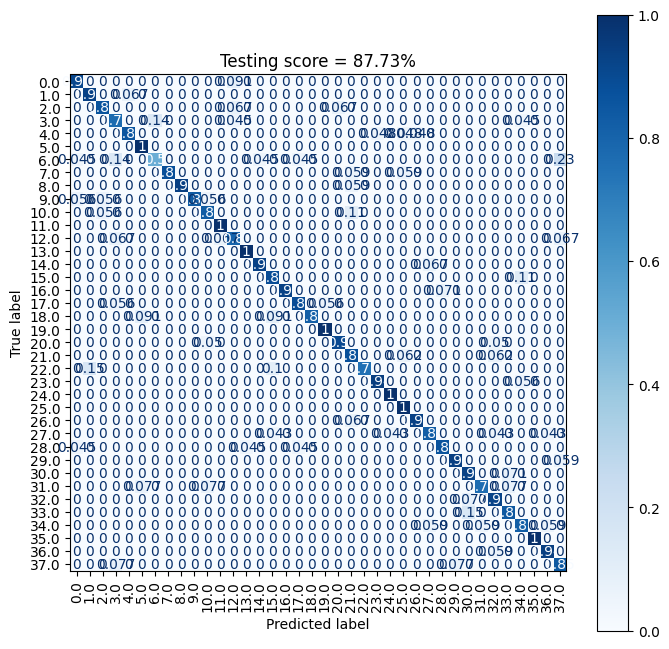

In [85]:
from sklearn.metrics import ConfusionMatrixDisplay
hidden_layers = (200, 100, 100) 
activation = "relu" # the default
opts = dict(hidden_layer_sizes = hidden_layers, verbose = True, activation = activation, 
            max_iter = 100000, alpha = 0.0001, learning_rate = "adaptive" )
solver = "adam" # default solver

clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(X_train, y_train)
predictions = clf_MLP.predict(X_test)

fig, ax = plt.subplots(figsize = (8, 8))
#confusion matrix
title = "Testing score = {:.2f}%".format(100*clf_MLP.score(X_test, y_test))
disp = ConfusionMatrixDisplay.from_estimator(
    clf_MLP, 
    X_test, 
    y_test, 
    xticks_rotation = "vertical",
    #display labels
    ax = ax, 
    cmap = plt.cm.Blues,
    normalize = "true")

disp.ax_.set_title(title)
plt.show()
origin_neu_relu = round(clf_MLP.score(X_test, y_test), 2)

grid research 設置的參數還是太少，最後沒有完全選用grid research的結果
而是做了一些調整，即是hidden layer 選擇使用 (200,100,100) 而不是grid research的(100,100,100)
最後成功將準確度從一直都只有1%左右提升到90%
另外，必須將先前設定中使用的tol拿到，否則結果都會很差

根據此結果，嘗試利用此參數設定，將激活函數從"relu"改成"logistic"看看
可以看到，logistic的準確度還是非常差


Iteration 1, loss = 3.74224100
Iteration 2, loss = 3.70661113
Iteration 3, loss = 3.69069621
Iteration 4, loss = 3.67803043
Iteration 5, loss = 3.67314231
Iteration 6, loss = 3.66969498
Iteration 7, loss = 3.66743557
Iteration 8, loss = 3.66605397
Iteration 9, loss = 3.66536433
Iteration 10, loss = 3.66448790
Iteration 11, loss = 3.66218148
Iteration 12, loss = 3.66410904
Iteration 13, loss = 3.66158183
Iteration 14, loss = 3.65938233
Iteration 15, loss = 3.65964444
Iteration 16, loss = 3.65878141
Iteration 17, loss = 3.65867826
Iteration 18, loss = 3.65817984
Iteration 19, loss = 3.65738998
Iteration 20, loss = 3.65661838
Iteration 21, loss = 3.65442295
Iteration 22, loss = 3.65438017
Iteration 23, loss = 3.65589272
Iteration 24, loss = 3.65370247
Iteration 25, loss = 3.65472977
Iteration 26, loss = 3.65562777
Iteration 27, loss = 3.65499748
Iteration 28, loss = 3.65414768
Iteration 29, loss = 3.65319530
Iteration 30, loss = 3.65244232
Iteration 31, loss = 3.65059044
Iteration 32, los

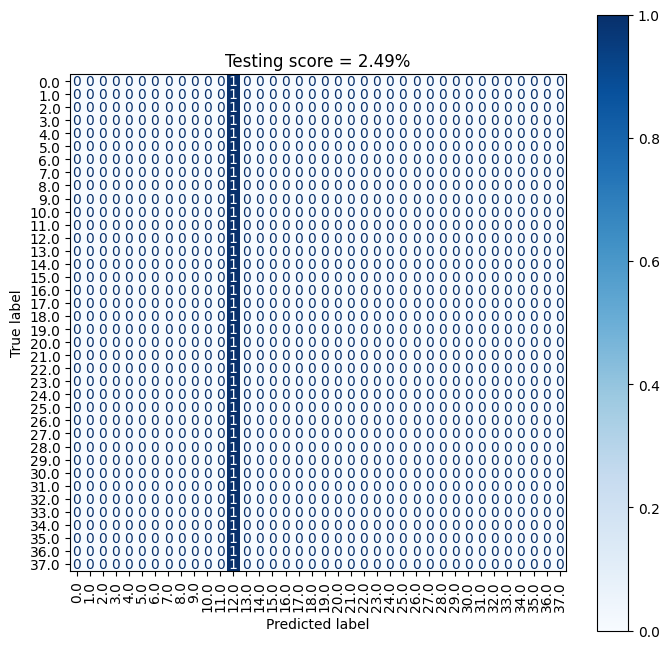

In [90]:
hidden_layers = (200, 150, 100) 
activation = "logistic" # the default
opts = dict(hidden_layer_sizes = hidden_layers, verbose = True, activation = activation, 
            max_iter = 10000, alpha = 0.1, learning_rate = "adaptive" )
solver = "adam" # default solver

clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(X_train, y_train)
predictions = clf_MLP.predict(X_test)

fig, ax = plt.subplots(figsize = (8, 8))
#confusion matrix
title = "Testing score = {:.2f}%".format(100*clf_MLP.score(X_test, y_test))
disp = ConfusionMatrixDisplay.from_estimator(
    clf_MLP, 
    X_test, 
    y_test, 
    xticks_rotation = "vertical",
    #display labels
    ax = ax, 
    cmap = plt.cm.Blues,
    normalize = "true")

disp.ax_.set_title(title)
plt.show()
origin_neu_logis = round(accuracy_score(y_test, predictions), 2)

結論：使用logistic參數無論怎麼調整參數都無法得到很好的結果

4. svd + logistic

In [12]:
from numpy.linalg import svd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

opts = dict(tol = 1e-6, max_iter = int(1e6), verbose = 1)

U, E, VT = svd(X_train_.T, full_matrices = False)

q = 25 #rank q approximation
Z_train = U[:, :q].T @ X_train_.T
clf_LR = LogisticRegression(solver = "lbfgs", **opts)
clf_LR.fit(Z_train.T, y_train)

Z_test = U[:, :q].T @ X_test_.T
predictions = clf_LR.predict(Z_test.T)
print(classification_report(y_test, predictions))


score = clf_LR.score(Z_train.T, y_train)
print(score)
score = clf_LR.score(Z_test.T, y_test)
print(score)
svd_logistic = round(accuracy_score(y_test, predictions), 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          988     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57312D+03    |proj g|=  3.61623D+03

At iterate   50    f=  4.50135D+02    |proj g|=  2.14723D+02

At iterate  100    f=  2.67103D+02    |proj g|=  1.19859D+02

At iterate  150    f=  2.25321D+02    |proj g|=  5.41992D+01

At iterate  200    f=  2.12831D+02    |proj g|=  4.56810D+01

At iterate  250    f=  2.07140D+02    |proj g|=  9.31791D+01

At iterate  300    f=  2.03766D+02    |proj g|=  1.25198D+01

At iterate  350    f=  2.01949D+02    |proj g|=  6.49306D+00

At iterate  400    f=  2.00850D+02    |proj g|=  1.72952D+01

At iterate  450    f=  2.00219D+02    |proj g|=  9.33703D+00

At iterate  500    f=  1.99779D+02    |proj g|=  6.05924D+00

At iterate  550    f=  1.99345D+02    |proj g|=  6.33996D+00

At iterate  600    f=  1.98836D+02    |proj g|=  1.01281D+01

At iterate  650    f=  1.9

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


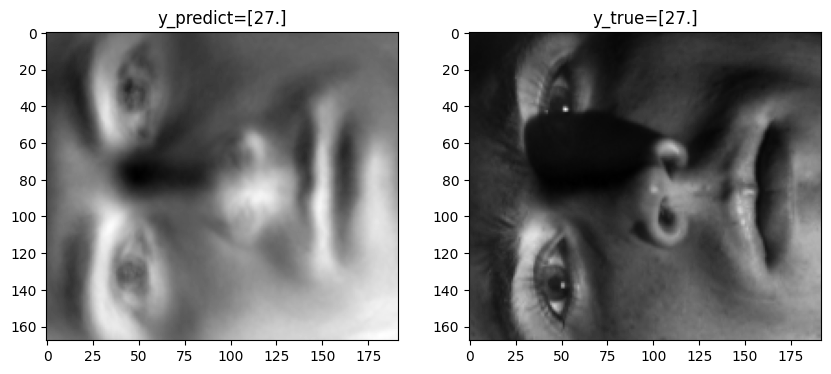

In [18]:
k = np.random.choice(np.arange(X_.T.shape[1]), replace = False, size = 1) #隨機選一張
_, ax = plt.subplots(1, 2, figsize = (10, 6))

#che = U[:, :q].T #25 4096
#check = X_.T[:, k] #4096 1
z = U[:, :q].T @ X_.T[:, k] #25 1
y_predict = clf_LR.predict(z.reshape(1, -1))
y_true = y[k]

ax[0].imshow((U[:, :q] @ z).reshape(168, 192), cmap = "gray")
ax[0].set_title("y_predict={}".format(y_predict))
ax[1].imshow(X_.T[:, k].reshape(168, 192), cmap = "gray")
ax[1].set_title("y_true={}".format(y_true))
plt.show()

5. svd + svm

In [55]:
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose = 1)
U, E, VT = svd(X_train_.T, full_matrices = False)
q = 25 #rank q approximation
Z_train = U[:, :q].T @ X_train_.T
Z_test = U[:, :q].T @ X_test_.T
# -------------------------------------------------------------

C = 5 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))
clf_svm = SVC(kernel="poly", **opts)

clf_svm.fit(Z_train.T, y_train)
predictions = clf_svm.predict(Z_test.T)
print("kernal 設為 poly 的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
svd_svm_poly = round(accuracy_score(y_test, predictions), 2)

# -------------------------------------------------------------
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))
clf_svm = SVC(kernel="linear", **opts)

clf_svm.fit(Z_train.T, y_train)
predictions = clf_svm.predict(Z_test.T)
print("kernal 設為 linear 的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
svd_svm_linear = round(accuracy_score(y_test, predictions), 2)

# -------------------------------------------------------------
C = 5 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))
clf_svm = SVC(kernel="rbf", **opts)

clf_svm.fit(Z_train.T, y_train)
predictions = clf_svm.predict(Z_test.T)
print("kernal 設為 rbf 的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
svd_svm_rbf = round(accuracy_score(y_test, predictions), 2)

kernal 設為 linear 的 svm 模型預測準確率
              precision    recall  f1-score   support

         0.0       0.62      0.91      0.74        11
         1.0       1.00      0.73      0.85        15
         2.0       0.80      0.53      0.64        15
         3.0       0.64      0.64      0.64        22
         4.0       1.00      0.76      0.86        21
         5.0       0.58      0.79      0.67        14
         6.0       0.35      0.36      0.36        22
         7.0       0.47      0.53      0.50        17
         8.0       1.00      0.76      0.87        17
         9.0       0.93      0.72      0.81        18
        10.0       0.85      0.61      0.71        18
        11.0       0.67      0.89      0.76         9
        12.0       1.00      0.80      0.89        15
        13.0       0.93      0.81      0.87        16
        14.0       0.83      0.67      0.74        15
        15.0       0.67      0.89      0.76         9
        16.0       0.87      0.93      0.90       

6. svd + neural network

激發函數設為"logistic"

Iteration 1, loss = 3.69905678
Iteration 2, loss = 3.65793956
Iteration 3, loss = 3.62840778
Iteration 4, loss = 3.60203580
Iteration 5, loss = 3.57931575
Iteration 6, loss = 3.55731277
Iteration 7, loss = 3.53674647
Iteration 8, loss = 3.51645622
Iteration 9, loss = 3.49579259
Iteration 10, loss = 3.47439211
Iteration 11, loss = 3.45332561
Iteration 12, loss = 3.43049515
Iteration 13, loss = 3.40748764
Iteration 14, loss = 3.38348575
Iteration 15, loss = 3.35970895
Iteration 16, loss = 3.33513115
Iteration 17, loss = 3.31104807
Iteration 18, loss = 3.28558560
Iteration 19, loss = 3.25975397
Iteration 20, loss = 3.23295834
Iteration 21, loss = 3.20515910
Iteration 22, loss = 3.17628674
Iteration 23, loss = 3.14712549
Iteration 24, loss = 3.11721229
Iteration 25, loss = 3.08721112
Iteration 26, loss = 3.05701437
Iteration 27, loss = 3.02564773
Iteration 28, loss = 2.99248144
Iteration 29, loss = 2.95894118
Iteration 30, loss = 2.92670921
Iteration 31, loss = 2.89509360
Iteration 32, los

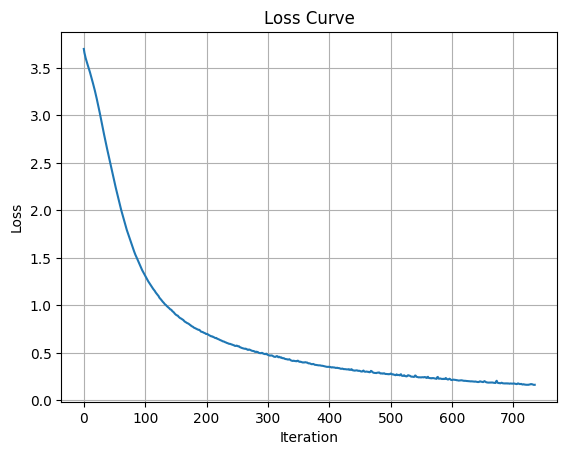

<Figure size 800x800 with 0 Axes>

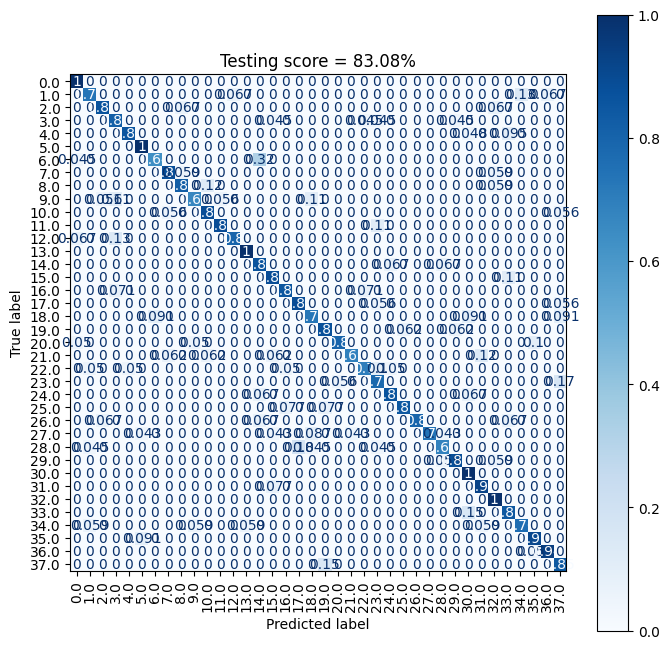

In [20]:
hidden_layers = (30, ) # one hidden layer #output decide by model #30個神經元
activation = "logistic"
opts = dict(hidden_layer_sizes = hidden_layers, verbose = True, \
activation = activation, tol = 1e-6, max_iter = int(1e6))
solver = "adam" # default solver

clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(Z_train.T, y_train)
predictions = clf_MLP.predict(Z_test.T)

print(classification_report(y_test, predictions))

plt.plot(clf_MLP.loss_curve_)
plt.grid(True)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.figure(figsize = (8, 8))
plt.show()

fig, ax = plt.subplots(figsize = (8, 8))
#confusion matrix
title = "Testing score = {:.2f}%".format(100*clf_MLP.score(Z_test.T, y_test))
disp = ConfusionMatrixDisplay.from_estimator(
    clf_MLP, 
    Z_test.T, 
    y_test, 
    xticks_rotation = "vertical",
    #display labels
    ax = ax, 
    cmap = plt.cm.Blues,
    normalize = "true")

disp.ax_.set_title(title)
plt.show()
svd_neu_logis = round(accuracy_score(y_test, predictions), 2)

激發函數設為"relu"

Iteration 1, loss = 20.57413633
Iteration 2, loss = 12.30539236
Iteration 3, loss = 8.08709896
Iteration 4, loss = 5.61183384
Iteration 5, loss = 4.03844736
Iteration 6, loss = 3.15580613
Iteration 7, loss = 2.47791765
Iteration 8, loss = 2.06536471
Iteration 9, loss = 1.68969003
Iteration 10, loss = 1.52523529
Iteration 11, loss = 1.32989125
Iteration 12, loss = 1.16530958
Iteration 13, loss = 1.09198017
Iteration 14, loss = 1.06226501
Iteration 15, loss = 0.92908532
Iteration 16, loss = 0.81496720
Iteration 17, loss = 0.80675242
Iteration 18, loss = 0.70923958
Iteration 19, loss = 0.64589207
Iteration 20, loss = 0.57872767
Iteration 21, loss = 0.59938942
Iteration 22, loss = 0.52476045
Iteration 23, loss = 0.49337467
Iteration 24, loss = 0.53028528
Iteration 25, loss = 0.50122101
Iteration 26, loss = 0.45824025
Iteration 27, loss = 0.40801629
Iteration 28, loss = 0.38541937
Iteration 29, loss = 0.45072769
Iteration 30, loss = 0.43619797
Iteration 31, loss = 0.39121533
Iteration 32, l

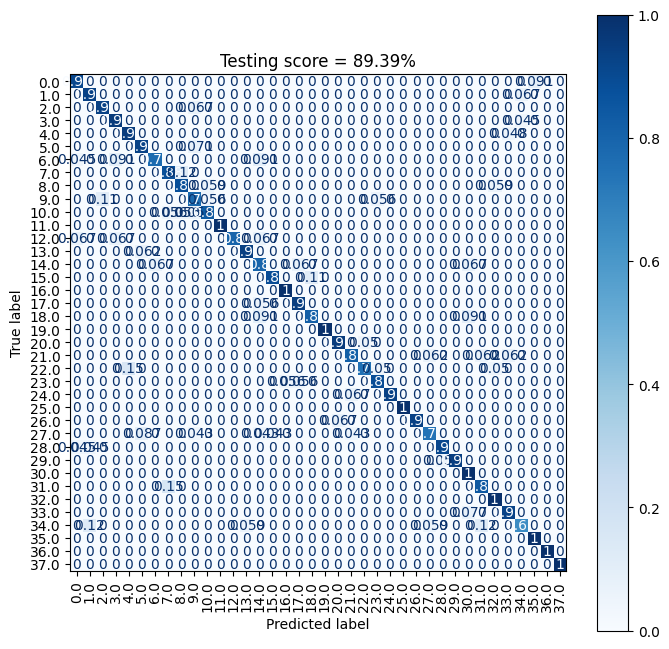

In [21]:
hidden_layers = (200, ) # one hidden layer #output decide by model #30個神經元
activation = "relu"
opts = dict(hidden_layer_sizes = hidden_layers, verbose = True, \
activation = activation, tol = 1e-6, max_iter = int(1e6))
solver = "adam" # default solver

clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(Z_train.T, y_train)
predictions = clf_MLP.predict(Z_test.T)

print(classification_report(y_test, predictions))

fig, ax = plt.subplots(figsize = (8, 8))
#confusion matrix
title = "Testing score = {:.2f}%".format(100*clf_MLP.score(Z_test.T, y_test))
disp = ConfusionMatrixDisplay.from_estimator(
    clf_MLP, 
    Z_test.T, 
    y_test, 
    xticks_rotation = "vertical",
    #display labels
    ax = ax, 
    cmap = plt.cm.Blues,
    normalize = "true")

disp.ax_.set_title(title)
plt.show()
svd_neu_relu = round(accuracy_score(y_test, predictions), 2)

從 svd分解的結果可以看到，svd+svm並設定參數為"poly"的結果最差，只有71%，
而且參數"rbf"跟"poly"的cost必須設到5才能得到比較好的準確度

7. pca + logistic

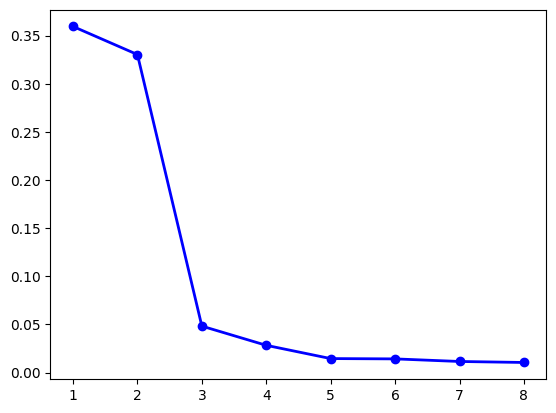

In [28]:
# PCA and Standardized data
# 繪製 scree plot
from sklearn.decomposition import PCA
pca = PCA(n_components = 8).fit(X_train_)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')


In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 30).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)

opts = dict(tol = 1e-6, max_iter = int(1e6), verbose = 1)
clf_LR = LogisticRegression(solver = "lbfgs", **opts)
clf_LR.fit(Z_train, y_train)

predictions = clf_LR.predict(Z_test)
score = clf_LR.score(Z_train, y_train)
score = clf_LR.score(Z_test, y_test)

pca_logistic = round(accuracy_score(y_test, predictions), 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1178     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57312D+03    |proj g|=  3.61623D+03

At iterate   50    f=  2.70355D+02    |proj g|=  7.57655D+02

At iterate  100    f=  1.38345D+02    |proj g|=  1.84619D+02

At iterate  150    f=  1.20695D+02    |proj g|=  1.49569D+02

At iterate  200    f=  1.10089D+02    |proj g|=  5.07986D+01

At iterate  250    f=  1.01026D+02    |proj g|=  5.61771D+01

At iterate  300    f=  9.55698D+01    |proj g|=  2.39930D+01

At iterate  350    f=  9.27583D+01    |proj g|=  1.91812D+01

At iterate  400    f=  9.17050D+01    |proj g|=  4.65733D+00

At iterate  450    f=  9.13041D+01    |proj g|=  2.37203D+00

At iterate  500    f=  9.11363D+01    |proj g|=  3.82307D+00

At iterate  550    f=  9.10464D+01    |proj g|=  1.13075D+01

At iterate  600    f=  9.09955D+01    |proj g|=  1.35005D+00

At iterate  650    f=  9.0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.7s finished


雖然根據上面的scree plot圖只需要4個主成分就能描述所有的資訊，但是必須將主成分數量設為30才能得到90%的準確度，
否則準確度會非常差

8. pca + svm

In [45]:
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA

# -------------------------------------------------------------

C = 10 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = 100000, verbose = True)
clf_svm = SVC(kernel="poly", **opts)

clf_svm.fit(Z_train, y_train)
predictions = clf_svm.predict(Z_test)
print("kernal 設為 poly 的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
pca_svm_poly = round(accuracy_score(y_test, predictions), 2)

# -------------------------------------------------------------
C = 3 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = 100000, verbose = True)
clf_svm = SVC(kernel="linear", **opts)

clf_svm.fit(Z_train, y_train)
predictions = clf_svm.predict(Z_test)
print("kernal 設為 linear 的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
pca_svm_linear = round(accuracy_score(y_test, predictions), 2)

# -------------------------------------------------------------
C = 10 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = 100000, verbose = True)
clf_svm = SVC(kernel="rbf", **opts)

clf_svm.fit(Z_train, y_train)
predictions = clf_svm.predict(Z_test)
print("kernal 設為 rbf 的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
pca_svm_rbf = round(accuracy_score(y_test, predictions), 2)

[LibSVM]....*.*
optimization finished, #iter = 516
obj = -96.102615, rho = -0.290385
nSV = 35, nBSV = 6
.....*.*
optimization finished, #iter = 690
obj = -192.935820, rho = -0.624628
nSV = 48, nBSV = 18
.....*.*
optimization finished, #iter = 636
obj = -173.496716, rho = 0.808647
nSV = 46, nBSV = 18
...*.*
optimization finished, #iter = 395
obj = -59.456603, rho = -0.533712
nSV = 27, nBSV = 4
.......*..*
optimization finished, #iter = 957
obj = -124.006824, rho = -0.315671
nSV = 38, nBSV = 7
..........*.*
optimization finished, #iter = 1130
obj = -149.487182, rho = 0.664827
nSV = 49, nBSV = 13
....*.*
optimization finished, #iter = 517
obj = -134.238339, rho = 0.592796
nSV = 41, nBSV = 15
..*
optimization finished, #iter = 292
obj = -132.248337, rho = 0.343006
nSV = 39, nBSV = 15
.....*.*
optimization finished, #iter = 648
obj = -110.430261, rho = -0.695422
nSV = 36, nBSV = 7
....*.*
optimization finished, #iter = 477
obj = -86.099358, rho = -0.115607
nSV = 35, nBSV = 6
....*.*
optimiz

在pca+svm模型中，最大疊代次數max_iter設到10000，參數"rbf"跟"poly"的cost必須設到10，才能得到90%、78%、88％的準確度

9. pca + neural network

Iteration 1, loss = 3.71573688
Iteration 2, loss = 3.66982689
Iteration 3, loss = 3.63530757
Iteration 4, loss = 3.60576606
Iteration 5, loss = 3.57887003
Iteration 6, loss = 3.55393984
Iteration 7, loss = 3.52936129
Iteration 8, loss = 3.50546200
Iteration 9, loss = 3.48211759
Iteration 10, loss = 3.45868106
Iteration 11, loss = 3.43541123
Iteration 12, loss = 3.41139405
Iteration 13, loss = 3.38656866
Iteration 14, loss = 3.36207523
Iteration 15, loss = 3.33640685
Iteration 16, loss = 3.31021414
Iteration 17, loss = 3.28312722
Iteration 18, loss = 3.25502864
Iteration 19, loss = 3.22588492
Iteration 20, loss = 3.19619860
Iteration 21, loss = 3.16841112
Iteration 22, loss = 3.13914347
Iteration 23, loss = 3.10768382
Iteration 24, loss = 3.07476767
Iteration 25, loss = 3.04196742
Iteration 26, loss = 3.00752948
Iteration 27, loss = 2.97175076
Iteration 28, loss = 2.93417117
Iteration 29, loss = 2.89705011
Iteration 30, loss = 2.85986930
Iteration 31, loss = 2.82312497
Iteration 32, los

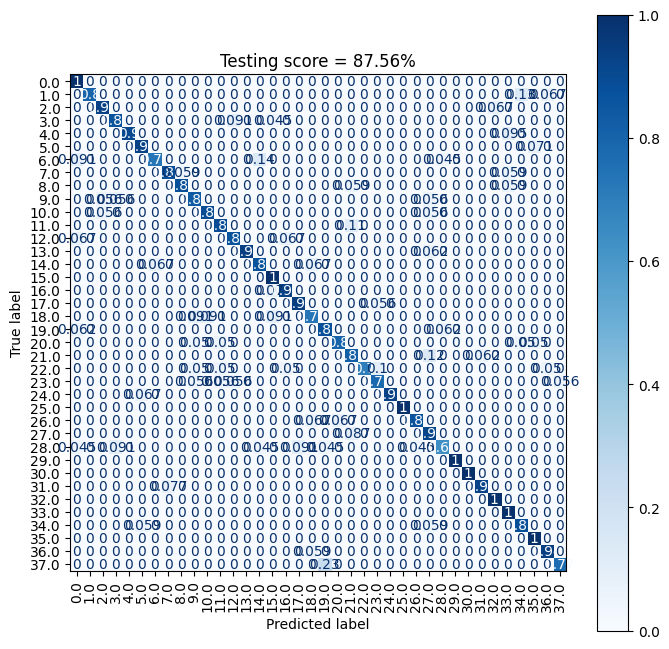

In [46]:

# -------------------------------------------------------------
hidden_layers = (30, ) # one hidden layer #output decide by model #30個神經元
activation = "logistic"
opts = dict(hidden_layer_sizes = hidden_layers, verbose = True, \
activation = activation, tol = 1e-6, max_iter = int(1e6))
solver = "adam" # default solver

clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(Z_train, y_train)
predictions = clf_MLP.predict(Z_test)

print(classification_report(y_test, predictions))

fig, ax = plt.subplots(figsize = (8, 8))
#confusion matrix
title = "Testing score = {:.2f}%".format(100*clf_MLP.score(Z_test, y_test))
disp = ConfusionMatrixDisplay.from_estimator(
    clf_MLP, 
    Z_test, 
    y_test, 
    xticks_rotation = "vertical",
    #display labels
    ax = ax, 
    cmap = plt.cm.Blues,
    normalize = "true")

disp.ax_.set_title(title)
plt.show()
pca_neu_logis = round(accuracy_score(y_test, predictions), 2)

Iteration 1, loss = 21.90611650
Iteration 2, loss = 12.51103480
Iteration 3, loss = 8.09169465
Iteration 4, loss = 5.39671328
Iteration 5, loss = 3.83621730
Iteration 6, loss = 2.91147019
Iteration 7, loss = 2.30544086
Iteration 8, loss = 1.86512705
Iteration 9, loss = 1.53533682
Iteration 10, loss = 1.39278680
Iteration 11, loss = 1.21130262
Iteration 12, loss = 1.07710168
Iteration 13, loss = 0.93768378
Iteration 14, loss = 0.83386386
Iteration 15, loss = 0.77130317
Iteration 16, loss = 0.76082980
Iteration 17, loss = 0.71317208
Iteration 18, loss = 0.72492863
Iteration 19, loss = 0.62100063
Iteration 20, loss = 0.52500670
Iteration 21, loss = 0.52710027
Iteration 22, loss = 0.47980506
Iteration 23, loss = 0.48789465
Iteration 24, loss = 0.40729982
Iteration 25, loss = 0.40680733
Iteration 26, loss = 0.40532416
Iteration 27, loss = 0.52024945
Iteration 28, loss = 0.38564756
Iteration 29, loss = 0.35420830
Iteration 30, loss = 0.31165111
Iteration 31, loss = 0.30516829
Iteration 32, l

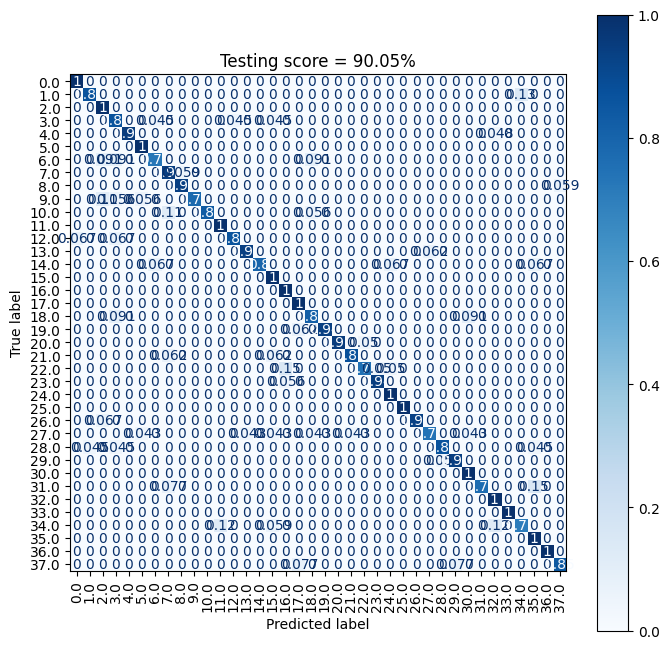

In [47]:
# -------------------------------------------------------------
hidden_layers = (200, ) # one hidden layer #output decide by model #30個神經元
activation = "relu"
opts = dict(hidden_layer_sizes = hidden_layers, verbose = True, \
activation = activation, tol = 1e-6, max_iter = int(1e6))
solver = "adam" # default solver

clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(Z_train, y_train)
predictions = clf_MLP.predict(Z_test)

print(classification_report(y_test, predictions))

fig, ax = plt.subplots(figsize = (8, 8))
#confusion matrix
title = "Testing score = {:.2f}%".format(100*clf_MLP.score(Z_test, y_test))
disp = ConfusionMatrixDisplay.from_estimator(
    clf_MLP, 
    Z_test, 
    y_test, 
    xticks_rotation = "vertical",
    #display labels
    ax = ax, 
    cmap = plt.cm.Blues,
    normalize = "true")

disp.ax_.set_title(title)
plt.show()
pca_neu_relu = round(accuracy_score(y_test, predictions), 2)

In [91]:
result = []
result.append((origin_logis, origin_svm_linear, origin_svm_poly, origin_svm_rbf, origin_neu_logis, origin_neu_relu))
result.append((svd_logistic, svd_svm_poly, svd_svm_linear, svd_svm_rbf, svd_neu_logis, svd_neu_relu))
result.append((pca_logistic, pca_svm_poly, pca_svm_linear, pca_svm_rbf, pca_neu_logis, pca_neu_relu))

results = pd.DataFrame(result, columns = ["Logistic", "SVM_poly", "SVM_linear", "SVM_rbf", "MLP_logistic", "MLP_relu"],
                       index = ["original", "standard+svd", "standard+PCA"])

print(results)

              Logistic  SVM_poly  SVM_linear  SVM_rbf  MLP_logistic  MLP_relu
original          0.95      0.94        0.84     0.80          0.02      0.88
standard+svd      0.87      0.71        0.89     0.83          0.83      0.89
standard+PCA      0.90      0.78        0.90     0.88          0.88      0.90


結論

1. 從上面的表格可以看到，除了 neural network 設定參數為"logistic"在原始資料的準確度表現很差，其他的分類器的準確度都還可以
2. 因為這個資料及比較大，直接針對original data進行分類的時候會跑非常久，在準確度都差不多的情況下，更建議使用svd或pva後的資料來進行分類
3. original data中，只有svm需要的分類時間比較少，logistic regression會跑最久